---

### LA ROBOT-RUN CAFE ANALYSIS

Because of the plan of opening a small robot-run cafe in Los Angeles.This research is made to help by studying the current market conditions of restaurants in Los Angeles.

### Table of Contents
* <a href="#Step 1">Opening the Data ></a><br>
    * <a href="#restdata">Data Head</a><br>
    * <a href="#restdatainfo">Data info</a><br>
        * <a href="#step1Conclusion">Conclusion</a><br>
* <a href="#Step 2">Data Analysis</a><br>
    * <a href="#estpropt">Proportion of Establishments</a><br>
    * <a href="#chainnonchain">Chain and Non Chain Proportion</a><br>
    * <a href="#chainest">Which type of establishment is typically a chain?</a><br>
    * <a href="#chainchar">What characterizes chains?</a><br>
    * <a href="#avgseats">The average seats for each type of restaurant</a><br>
    * <a href="#stname">Street name column</a><br>
    * <a href="#top10">The top 10 streets by number of restaurants</a><br>
    * <a href="#1rest">The streets with 1 restaurant</a><br>
    * <a href="#Top10seat">Top 10 street by restaurant seat distribution</a><br>
       * <a href="#step2conclusion">Conclusion</a><br>
* <a href="#Step 3">Recommendations</a><br>
    
           

In [1]:
import pandas as pd
import numpy as np
from numpy import median
import re
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

%matplotlib inline 
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

<p><a name="Step 1"></a></p>

### Step 1. Download the data and prepare it for analysis

In [2]:
try:
    rest_data = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 9/rest_data_us.csv')
except:
    rest_data = pd.read_csv('/datasets/rest_data_us.csv')

<p><a name="restdata"></a></p>

In [3]:
#open the head of the dataframe
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
#print the tail of the dataframe
rest_data.tail()

,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


In [5]:
# change the column names to easily understand
rest_data.columns = ['id', 'est_name', 'address', 'chain_type', 'est_type', 'seats']

In [6]:
#convert the chain type from object to bool
rest_data = rest_data.astype({"chain_type": bool})

In [7]:
# replace the boolean value
chain_name = rest_data['chain_type'].replace(to_replace = [False, True], value = ['non chain', 'chain'])
rest_data['chain_type'] = chain_name
rest_data.head()

,id,est_name,address,chain_type,est_type,seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,non chain,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,non chain,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,non chain,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,non chain,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,non chain,Restaurant,20


In [8]:
# check for the shape
rest_data.shape

(9651, 6)

In [9]:
#check if there are Null values
rest_data.isnull().sum()

id            0
est_name      0
address       0
chain_type    0
est_type      0
seats         0
dtype: int64

In [10]:
# drop all rows with any NaN and NaT values
rest_null = rest_data.dropna()

In [11]:
# check for duplicate entry
rest_data.duplicated().sum()

0

<p><a name="restdatainfo"></a></p>

In [13]:
# check the general information of the dataset
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          9651 non-null   int64 
 1   est_name    9651 non-null   object
 2   address     9651 non-null   object
 3   chain_type  9651 non-null   object
 4   est_type    9651 non-null   object
 5   seats       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


<p><a name="step1Conclusion"></a></p>

### Step 1 Conclusion

Our Dataset has 9651 rows and  6 columns.all the columns names was change so its easier to understand. Tha chain_type columns value was converted from object to bool type and later  changed the values from from true and false to chain and non chain. We dont have duplicates but we have 3 Null values in the chain_type column and since its too small the dropping it wont affect the dataset. After the cleaning the data set is therefore ready for processing and manipulation.


<p><a name="Step 2"></a></p>

### Step 2. Data analysis

   * Graphical presentation of the proportions of the various types of establishments.

In [14]:
est_group = rest_data.groupby('est_type').count()
est_group

,id,est_name,address,chain_type,seats
est_type,,,,,
Bakery,283,283,283,283,283
Bar,292,292,292,292,292
Cafe,435,435,435,435,435
Fast Food,1066,1066,1066,1066,1066
Pizza,320,320,320,320,320
Restaurant,7255,7255,7255,7255,7255


In [15]:
# make a go pie for the presentation of proportion
est_fig = go.Figure(data=[go.Pie(labels=est_group.index.values, values=est_group['chain_type'])])
est_fig.update_layout(
    title="The proportions of establishments in LA",
    font=dict(family="Arial", size=12, color="#7f7f7f"))

est_fig.show()

<p><a name="estprop"></a></p>


As we can see in the bar chart above, 75.2%  or 3/ 4 of the establishment in LA is Restaurant type, while the smallest is the bakery type. The high proportion means its more popular , theres a big market but it also means higher competition.

<p><a name="chainnonchain"></a></p>

* **The proportions of chain and nonchain establishments.**

In [16]:
# Create a Group by object using visit date
chain_group =rest_data.groupby('chain_type').count()

In [17]:
# plot a pie for propostion distribution of chaoin and non chain establishments
chain_fig = go.Figure([go.Bar(x=chain_group.index.values,y=chain_group['est_type'])])

#update the layout
chain_fig.update_layout(
    title="Proportions of chain and nonchain establishments",
    xaxis_title="Type of establishments",
    yaxis_title="Number of establishment",
    font=dict(family="Arial", size=16, color="RebeccaPurple"))

chain_fig.show()

The Proportion of the pie graph shows that  5.972 non chain establishment or 61.9% of the total establöishment in LA which is coparably bigger to the 3,679 chain establishments or 38.1%.

<p><a name="chainest"></a></p>

* **Which type of establishment is typically a chain?**

In [18]:
#we will create an dataframe of all non chain establishment
nonchain_est = rest_data['chain_type'] == 'non chain' 
nonchain_est_list = rest_data[nonchain_est]
nonchain_est_list.head()

,id,est_name,address,chain_type,est_type,seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,non chain,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,non chain,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,non chain,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,non chain,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,non chain,Restaurant,20


In [19]:
# we will make a saparate data frame of the chain establishments
chain_est = rest_data['chain_type'] == 'chain' 

In [20]:
chain_est_list = rest_data[chain_est]
chain_est_list.head()

,id,est_name,address,chain_type,est_type,seats
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,chain,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,chain,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,chain,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,chain,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,chain,Bakery,26


In [21]:
#group the non chain establishments 
nonchain_list_group =nonchain_est_list.groupby('est_type').count()

In [22]:
# Create a Group by establishment type
chain_list_group =chain_est_list.groupby('est_type').count()

In [23]:
# put the 2 new dataframe of chain and and non chain establishment in graph
fig = go.Figure()
fig.add_trace(go.Bar(x=nonchain_list_group.index.values,y=nonchain_list_group['chain_type'],
                     name='non chain establishment', marker_color='indianred'))
fig.add_trace(go.Bar( x=chain_list_group.index.values,y=chain_list_group['chain_type'],name='chain establishment',
                     marker_color='lightsalmon'))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, title="The Typical Chain Establishment",
                  xaxis_title="Type of establishments", yaxis_title="establishment count",
                  font=dict(family="Courier New, monospace", size=12, color="RebeccaPurple"))
                  
fig.show();

All Bakery in LA is part of a chain establishment, while Cafe and fastfood has a higher chance of being a chain: In addition, around 1/3 (31.6%) of restaurants belong to chains; this is likely the reason why non-chains were well represented in the pie chart earlier.This data could suggest that it will be wiser to open a restaurant than a cafe.



<p><a name="chainchar"></a></p>

* **What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?**

In [24]:
chain= px.histogram(chain_est_list, x="seats", title=f"Chain seat character")
chain.update_layout(yaxis_title="Number of seats", xaxis_title="Number of establishments" )
chain.update_xaxes(type='category')
chain.show()

Base on our visualization, chain establishment tends to have more establishments with fewer seating capacity compared to establishment with more seats.Restaurants makes up for highest number of seats among the group.

<p><a name="avgseat"></a></p>

* **Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats?**

In [25]:
# group the data by establishment and an aggregationg the count and median of seats
rest_seat_grouped = rest_data.groupby('est_type').agg({'seats': ['count', 'median']})
rest_seat_grouped.columns = ['Total', 'average'] 
rest_seat_grouped

,Total,average
est_type,,
Bakery,283,18.0
Bar,292,28.5
Cafe,435,21.0
Fast Food,1066,21.0
Pizza,320,18.5
Restaurant,7255,29.0


In [26]:
# make a go bar for the presentation of proportion
fig = go.Figure(
    data=[go.Bar(x=rest_seat_grouped.index.values,y=rest_seat_grouped['average'])],
    layout_title_text="The average number of seats for each type of restaurant"
)
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  xaxis_title="Type of establishments", yaxis_title="Average seats")
                  
fig.show()

In general restaurant type had the highest number of average seats among the establishments, it has 29 average seats per establishment which is 21.3% from its total number. while bar closely follows which has 28.5 average numbe of seat per establishment or 21%.

<p><a name="stname"></a></p>

* **Put the data on street names from the address column in a separate column.**

In [27]:
# extracting the street name from the address column

def find_street(name):
    # finding a list of words, that don't contain only numbers
    word_list = re.findall("[0-9]*[A-Z']+[0-9]*\.?",name)
    adress = ''
    for word in word_list:
        adress += word + ' '
    return adress

In [28]:
rest_data['street'] = rest_data.address.apply(find_street)
rest_data.head()

,id,est_name,address,chain_type,est_type,seats,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,non chain,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,non chain,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,non chain,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,non chain,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,non chain,Restaurant,20,ECHO PARK AVE


<p><a name="top10"></a></p>

* **Plot a graph of the top ten streets by number of restaurants.**

In [29]:
# Create a Group by establishment type

street_list_group =rest_data.groupby('street')

In [30]:
#counting the street and getting the top 10 by calling the n_largest function

street_list = pd.DataFrame(street_list_group.size(), columns=['st_count'])
street_top10 = street_list.nlargest(10, 'st_count')
street_top10.sort_values('st_count',inplace=True)

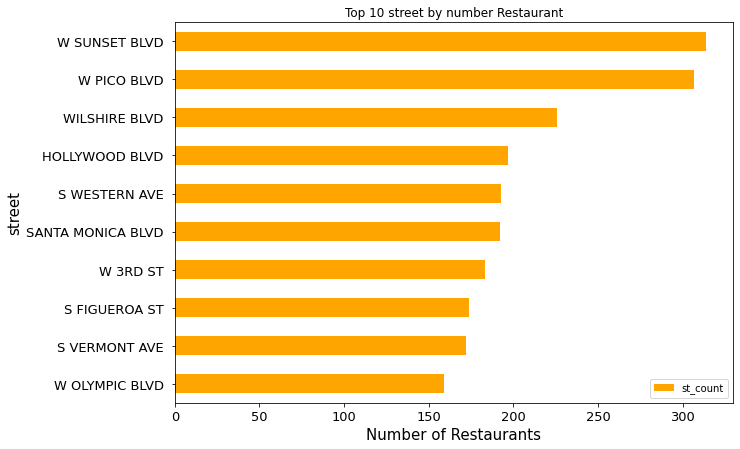

In [31]:
#Graphical presentation of Top 10 streets by number restaurants

street_top10.plot(kind='barh', figsize=(10,7), color="orange", fontsize=13);
plt.title('Top 10 street by number Restaurant')
plt.xlabel('Number of Restaurants', size=15)
plt.ylabel('street', size=15);

This streets above contains 159 - 314 establishments.

<p><a name="1rest"></a></p>

* **Find the number of streets that only have one restaurant.**

In [32]:
st_1 = street_list[street_list['st_count']==1].sum()
st_1

st_count    1134
dtype: int64

There are 1134 streets that only has 1 restaurant this is around 65% of the total number of streets.

<p><a name="Top10seat"></a></p>

* **For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?**

In [33]:
# grouping the street by seats
st_many_seat = rest_data.groupby('street')[['seats']].sum()

In [34]:
# joining 2 dataframe to have sum of seat and sum of restaurants

st_rest_seats = st_many_seat.join(street_list ,on='street')
st_rest_seats.sort_values(by = 'st_count', ascending = False).head()

,seats,st_count
street,,
W SUNSET BLVD,15906,314
W PICO BLVD,12429,307
WILSHIRE BLVD,12584,226
HOLLYWOOD BLVD,10933,197
S WESTERN AVE,8055,193


In [35]:
# adding average seat column of top 10 streets
st_rest_seats['avg_seat'] = st_rest_seats['seats'] / st_rest_seats['st_count']

In [36]:
# getting the list of average seat of the top 10 streets by restaurant number
st_seat_top10 = st_rest_seats.nlargest(10, 'st_count')
st_seat_top10.head()

,seats,st_count,avg_seat
street,,,
W SUNSET BLVD,15906,314,50.656051
W PICO BLVD,12429,307,40.485342
WILSHIRE BLVD,12584,226,55.681416
HOLLYWOOD BLVD,10933,197,55.497462
S WESTERN AVE,8055,193,41.735751


In [37]:
# Calculating the trend of seats in the top 10 streets

Top10_avg = st_seat_top10['seats'].sum() / st_seat_top10['st_count'].sum()
Top10_avg.round()

47.0

Looking at the trend of the streets with many restaurants it has an avarage of 47 seats per restaurant.

<p><a name="Step2conclusion"></a></p>

**Step 2 Conclusion**

After studiying the restaurant market in LA, we found out that 3/4 of the establishments are restaurants and the rest of the 1/4 are shared by bar, cafe, bakery, fast and pizza.Wen we look the type of establishment we founf out that the 61.9% of the estbalishments are non chain or independent stand alone establishments while 38.1% belongs to the chain establishment. Restaurant makes up for the most non chain establishment while cafe and fastfood has a higher tendency of being part of a chain.The establishments thats part of the chain leans to have more establishment but fewer seats.We also noticed that there are few streets which are very populated with establishment but there are 65% streets  that only has 1 restaurant. As for the seat number trend we also found out that 47 seat is the average number of seats in the streets with many establishments.

<p><a name="Step 3"></a></p>

### Recommendations

When thinking about establishing a small robot-run cafe in Los Angeles, we have studied the market and found out that
the company should consider opening a restaurant rather than a cafe, Restaurant market has more place for independent owners than of the chain ones and small cafes are being out-competed by cafe chains.

The company should consider starting off as an independent standalone establishment with 47 seats as it is the average seat number of restaurants in top 10 streets with the highest number of restaurants and, depending on its market strategy, we have to select a street with either in the ones with many restaurants as it is more popular to customers for restaunrats or a street with only one restaurant since the competition is likely low. If everything works out fine then we can think of expanding by establishing a chain based on the novelty of its robot-waiter approach.

Presentation: <link https://drive.google.com/file/d/1q_GlFKGhUvR3h-YIZq-ueTLv1O80L-Me/view?usp=sharing>